In [1]:
#IMPORTING LIBRARIES
#sales prediction                                                                                  
import warnings
warnings.filterwarnings('ignore')

#import packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#LOADING DATA

In [3]:
sp = pd.DataFrame(pd.read_csv(r"C:\Users\91918\Downloads\Sales Prediction.csv"))
sp.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
# DATA CHECKING

In [5]:
sp.shape

(200, 5)

In [6]:
sp.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [7]:
sp.count()

Unnamed: 0    200
TV            200
Radio         200
Newspaper     200
Sales         200
dtype: int64

In [8]:
#CLEANING DATA

In [9]:
sp.isnull().sum()*100/sp.shape[0]

Unnamed: 0    0.0
TV            0.0
Radio         0.0
Newspaper     0.0
Sales         0.0
dtype: float64

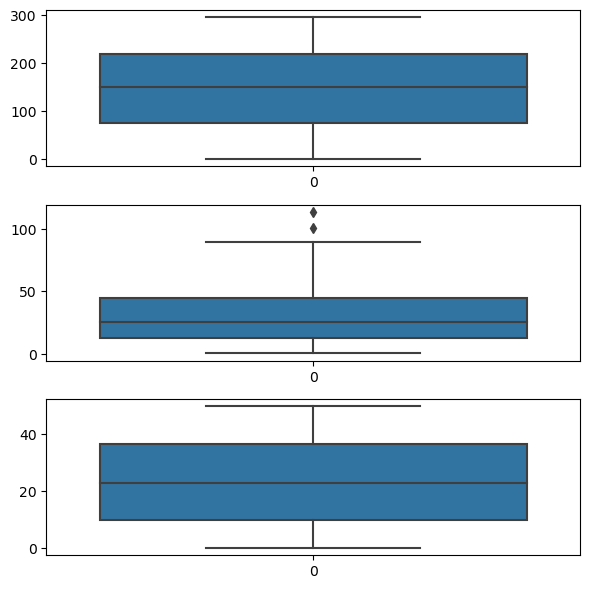

In [10]:
fig, axs = plt.subplots(3, figsize = (6,6))
plt1 = sns.boxplot(sp['TV'], ax = axs[0])
plt2 = sns.boxplot(sp['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(sp['Radio'], ax = axs[2])
plt.tight_layout()

In [11]:
#EXPLORATORY DATA ANALYSIS

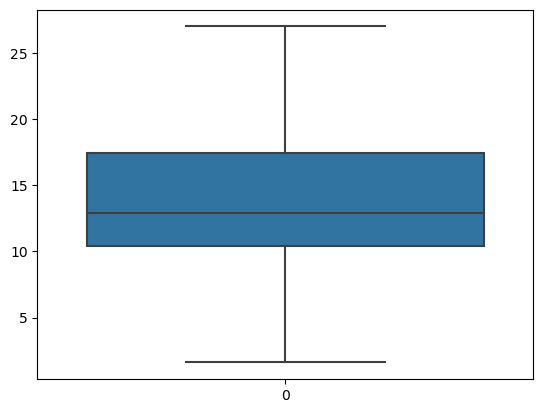

In [12]:
sns.boxplot(sp['Sales'])
plt.show()

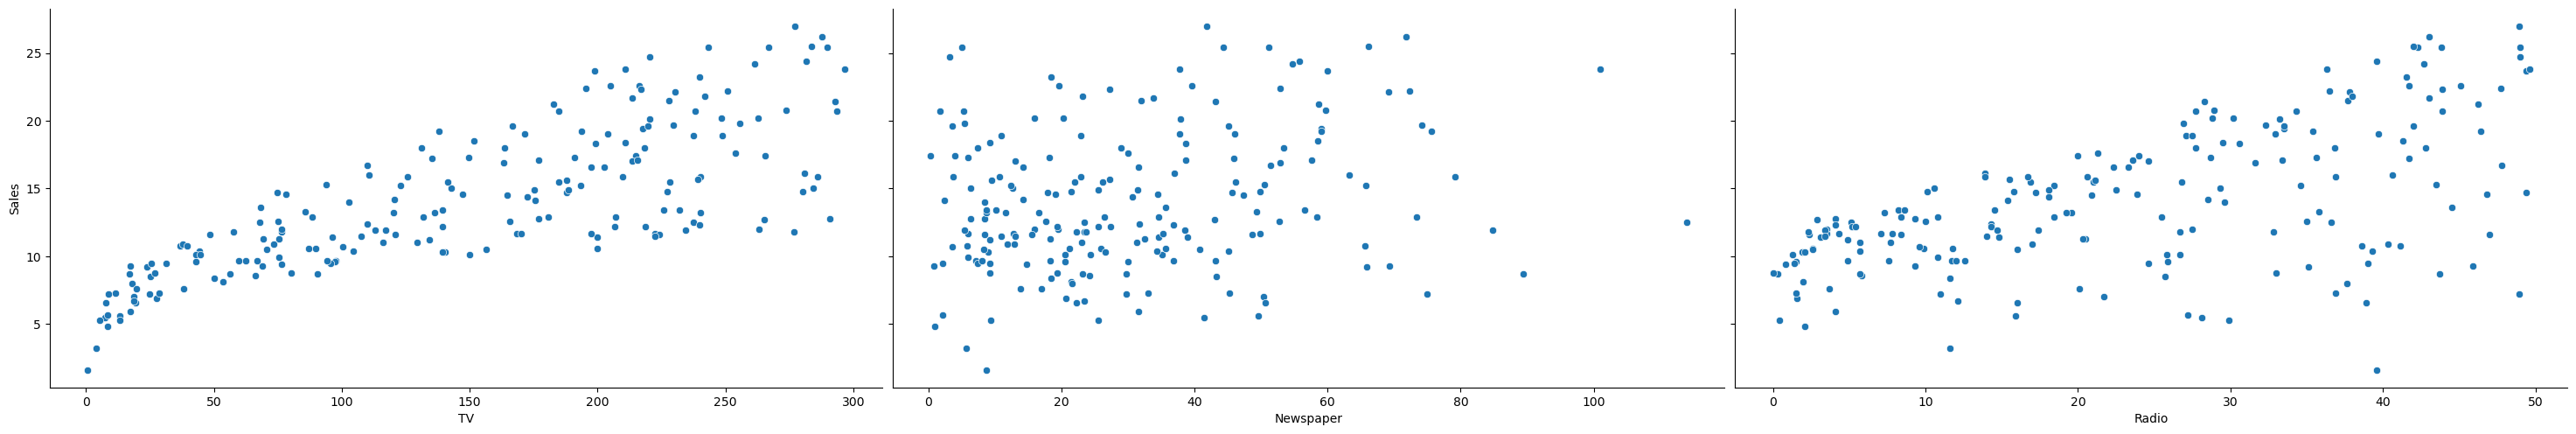

In [13]:
sns.pairplot(sp, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=5, aspect=2, kind='scatter')
plt.show()

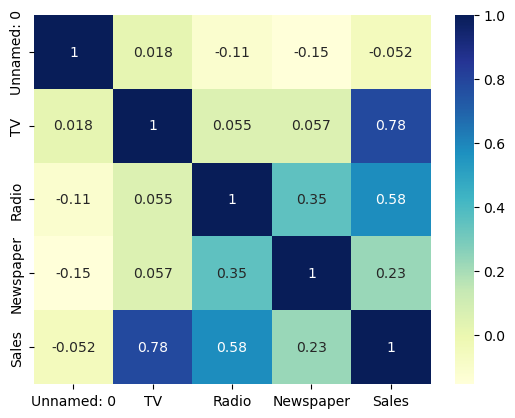

In [14]:
sns.heatmap(sp.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [15]:
#MODEL BUILDING

In [16]:
X = sp['TV']
y = sp['Sales']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [18]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [19]:
y_train.head()

74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
Name: Sales, dtype: float64

In [20]:
import statsmodels.api as sm

In [21]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [22]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    6.989666
TV       0.046497
dtype: float64

In [23]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     219.0
Date:                Mon, 03 Jul 2023   Prob (F-statistic):           2.84e-30
Time:                        19:47:58   Log-Likelihood:                -370.62
No. Observations:                 140   AIC:                             745.2
Df Residuals:                     138   BIC:                             751.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9897      0.548     12.762      0.0

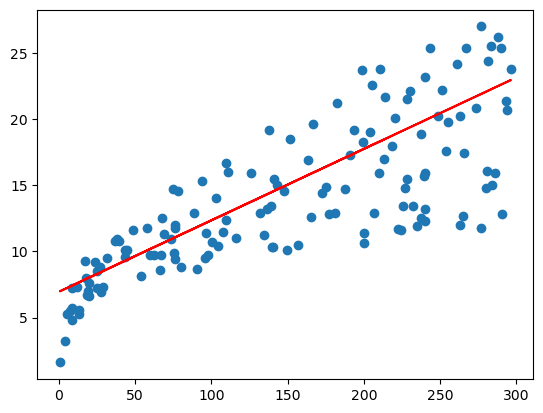

In [24]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

In [25]:
#EVALUATING THE MODELRRR

In [26]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

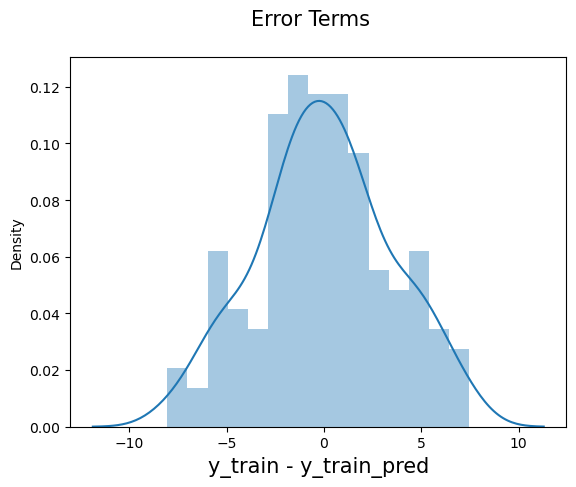

In [27]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)           
plt.xlabel('y_train - y_train_pred', fontsize = 15)         
plt.show()

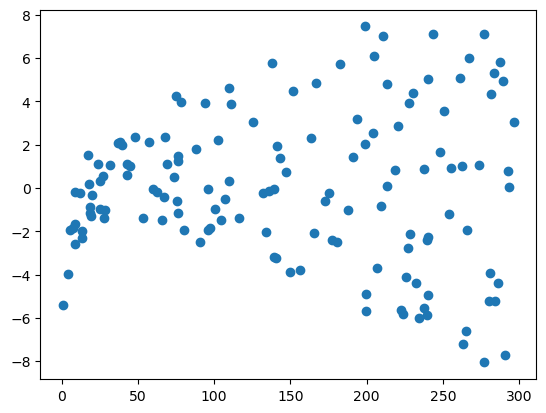

In [28]:
plt.scatter(X_train,res)
plt.show()

In [29]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [30]:
y_pred.head()

126     7.352345
104    18.065337
99     13.276109
92     17.112141
111    18.228077
dtype: float64

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [32]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.8241456288327016

In [33]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.59429872677833

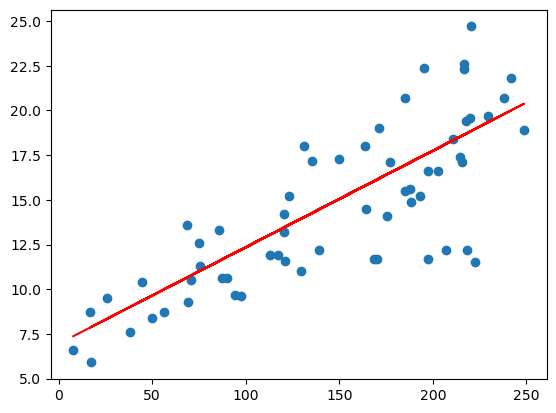

In [34]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()